In [1]:
import pandas as pd

df = pd.read_csv("./Titanic.csv")
print(df.head)

<bound method NDFrame.head of       Unnamed: 0 pclass  survived                             name     sex  \
0              1    1st         1    Allen, Miss. Elisabeth Walton  female   
1              2    1st         1   Allison, Master. Hudson Trevor    male   
2              3    1st         0     Allison, Miss. Helen Loraine  female   
3              4    1st         0  Allison, Mr. Hudson Joshua Crei    male   
4              5    1st         0  Allison, Mrs. Hudson J C (Bessi  female   
...          ...    ...       ...                              ...     ...   
1304        1305    3rd         0             Zabour, Miss. Hileni  female   
1305        1306    3rd         0            Zabour, Miss. Thamine  female   
1306        1307    3rd         0        Zakarian, Mr. Mapriededer    male   
1307        1308    3rd         0              Zakarian, Mr. Ortin    male   
1308        1309    3rd         0               Zimmerman, Mr. Leo    male   

          age  sibsp  parch  tick

In [2]:
from sklearn.model_selection import train_test_split

#Set value of random_state so that data split is the same every time
train_df, test_df = train_test_split(df, test_size=0.2)

print("Training set size:", len(train_df))
print("Test set size:", len(test_df))

Training set size: 1047
Test set size: 262


In [3]:
class_mapping = {'1st': 1, '2nd': 2, '3rd': 3}
df['pclass'] = df['pclass'].map(class_mapping)

class_mapping = {'male': 0, 'female': 1}
df['sex'] = df['sex'].map(class_mapping)

df.dropna(subset=['age'], inplace=True)

df['survived'] = df['survived'].astype('category').cat.codes

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

features = df[['pclass', 'sex', 'age', 'sibsp']]
output = df['survived']

x_train, x_test, y_train, y_test = train_test_split(features, output, test_size=0.2)

print("Training set size:", len(x_train))
print("Test set size:", len(x_test))

Training set size: 836
Test set size: 210


In [5]:
print(x_train)

      pclass  sex   age  sibsp
218        1    1  39.0      0
650        3    1  17.0      0
519        2    0  28.0      0
640        3    0   9.0      4
894        3    0   4.0      1
...      ...  ...   ...    ...
32         1    1  30.0      0
1082       3    0   9.0      0
552        2    0  19.0      0
388        2    1  28.0      0
1091       3    1  20.0      0

[836 rows x 4 columns]


In [6]:
print(y_train)

218     1
650     0
519     0
640     0
894     1
       ..
32      1
1082    1
552     0
388     1
1091    0
Name: survived, Length: 836, dtype: int8


In [67]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeClassifier(max_depth=10)

model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [68]:
from sklearn.tree import export_graphviz
import graphviz

tree = export_graphviz(model, feature_names=x_train.columns, class_names=['0', '1'], impurity=False, proportion=False, node_ids=False, label='all')
graph=graphviz.Source(tree)
graph.render(view=True)

'Source.gv.pdf'

In [69]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [81]:
def calc_survivors_fatalies(actuals, predictions, label):
    correct_prediction = ((actuals == predictions) & (actuals == label))
    correct = correct_prediction.sum()
    label_prediction = (actuals == label)
    num_predictions = label_prediction.sum()
    percentage = correct / num_predictions
    return percentage

In [82]:
train_fatality_percent = calc_survivors_fatalies(y_train, y_train_pred, 0)
print("Train fatality percent accuracy: ", train_fatality_percent)
train_survived_percent = calc_survivors_fatalies(y_train, y_train_pred, 1)
print("Train survived percent accuracy: ", train_survived_percent)

Train fatality percent accuracy:  0.9482071713147411
Train survived percent accuracy:  0.8023952095808383


In [83]:
test_fatality_percent = calc_survivors_fatalies(y_test, y_test_pred, 0)
print("Test fatality percent accuracy: ", test_fatality_percent)
test_survived_percent = calc_survivors_fatalies(y_test, y_test_pred, 1)
print("Test survived percent accuracy: ", test_survived_percent)

Test fatality percent accuracy:  0.8290598290598291
Test survived percent accuracy:  0.7096774193548387


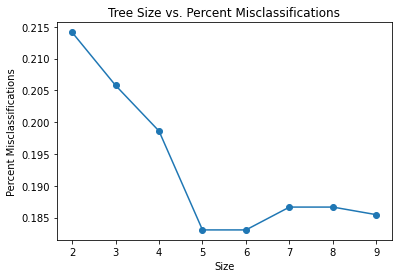

In [90]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

tree_size = []
num_misclassification = []

max_tree = 10

for size in range(2, max_tree):
    tree_size.append(size)
    classifier = DecisionTreeClassifier(max_leaf_nodes=size)
    score = cross_val_score(classifier, x_train, y_train, cv=5)
    misclassification_rate = 1 - np.mean(score)
    num_misclassification.append(misclassification_rate)

plt.plot(tree_size, num_misclassification, marker='o')
plt.xlabel('Size')
plt.ylabel('Percent Misclassifications')
plt.title('Tree Size vs. Percent Misclassifications')
plt.show()

In [91]:
minimum = min(num_misclassification)
optimal_size = tree_size[num_misclassification.index(minimum)]
print("Ideal tree size is: ", optimal_size)

Ideal tree size is:  5


In [92]:
model_pruned = DecisionTreeClassifier(max_depth=optimal_size)
model_pruned.fit(x_train, y_train)

tree = export_graphviz(model_pruned, feature_names=x_train.columns, class_names=['0', '1'], impurity=False, proportion=False, node_ids=False, label='all')
graph=graphviz.Source(tree)
graph.render(view=True)

'Source.gv.pdf'

In [87]:
y_train_pred_pruned = model_pruned.predict(x_train)
y_test_pred_pruned = model_pruned.predict(x_test)

In [88]:
train_fatality_percent = calc_survivors_fatalies(y_train, y_train_pred_pruned, 0)
print("Train fatality percent accuracy: ", train_fatality_percent)
train_survived_percent = calc_survivors_fatalies(y_train, y_train_pred_pruned, 1)
print("Train survived percent accuracy: ", train_survived_percent)

Train fatality percent accuracy:  0.9183266932270916
Train survived percent accuracy:  0.7275449101796407


In [89]:
test_fatality_percent = calc_survivors_fatalies(y_test, y_test_pred_pruned, 0)
print("Test fatality percent accuracy: ", test_fatality_percent)
test_survived_percent = calc_survivors_fatalies(y_test, y_test_pred_pruned, 1)
print("Test survived percent accuracy: ", test_survived_percent)

Test fatality percent accuracy:  0.8717948717948718
Test survived percent accuracy:  0.6881720430107527


Overall, the test fatality accuracy increased by about 8% and the test survived passenger decreased by about 1%. This denoted a small increase in performance due to pruning the tree from size of 10 to size of 5. 